# The Behavioral Risk Factor Data on Tobacco Use

The Behavioral Risk Factor Data on Tobacco Use (2010 and Prior), provided by the Centers for Disease Control and Prevention (CDC), offers insights into tobacco use patterns in the U.S. from data collected through the State Tobacco Activities Tracking and Evaluation (STATE) System and the Behavioral Risk Factor Surveillance System (BRFSS) surveys, spanning from 1996 to 2010.

The BRFSS is a state-based, continuous surveillance system that gathers data on modifiable risk factors for chronic diseases and other major causes of death. The data from the STATE System, which was derived from the BRFSS surveys, focuses on key tobacco-related topics, such as:

* Cigarette smoking status (whether individuals currently smoke, have smoked, or have never smoked).
* Cigarette smoking prevalence across different demographic groups (age, gender, race/ethnicity, etc.).
* The frequency of cigarette smoking among those who smoke.
* The frequency and success of quit attempts by smokers.


Importantly, this data should not be compared to BRFSS data collected from 2011 onward, as the survey methodologies were altered after that year.

Source Attribution: Centers for Disease Control and Prevention, Data.gov.

1. Import all the important libraries.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Upload the data set under the variable 'tobdata'

In [77]:
tobdata= pd.read_csv("Tobacco use -1969-2010.csv")

3. Display the dataset

In [78]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

              MeasureDesc  Data_Value(%)  Sample_Size  Gender       Race  \
0            Quit Smoking           53.3       

In [79]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [80]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [81]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 12)


3. Data Cleaning

In [82]:
###To check the null value, datatype, number of columns and number of rows.
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   MeasureDesc    38050 non-null  object 
 5   Data_Value(%)  36091 non-null  float64
 6   Sample_Size    36041 non-null  float64
 7   Gender         38050 non-null  object 
 8   Race           38050 non-null  object 
 9   Age            38050 non-null  object 
 10  Education      38050 non-null  object 
 11  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [83]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

In [84]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

There is 3053 Duplicate value


In [85]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


In [86]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                0
LocationAbbr        0
LocationDesc        0
TopicDesc           0
MeasureDesc         0
Data_Value(%)    1311
Sample_Size      1361
Gender              0
Race                0
Age                 0
Education           0
DataSource          0
dtype: int64 Null Values


YEAR             0.000000
LocationAbbr     0.000000
LocationDesc     0.000000
TopicDesc        0.000000
MeasureDesc      0.000000
Data_Value(%)    3.746035
Sample_Size      3.888905
Gender           0.000000
Race             0.000000
Age              0.000000
Education        0.000000
DataSource       0.000000
dtype: float64

In [87]:
tob_filled = Ctobdata.fillna(0)
Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_10208\1113718492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10208\1113718492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [88]:
Null_value=Ctobdata.isnull().sum()
Null_value

YEAR             0
LocationAbbr     0
LocationDesc     0
TopicDesc        0
MeasureDesc      0
Data_Value(%)    0
Sample_Size      0
Gender           0
Race             0
Age              0
Education        0
DataSource       0
dtype: int64

In [89]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
CA    675
WA    675
MN    674
NV    674
TX    673
AK    673
MI    673
OK    672
FL    672
OR    671
AZ    671
MA    671
NY    671
NM    670
NJ    670
NC    670
MD    670
PA    668
RI    668
VA    668
KS    668
IN    668
WI    667
CO    666
CT    666
MO    666
LA    664
GA    664
NE    664
OH    663
SC    663
DE    663
IL    663
AR    659
ID    658
UT    658
AL    655
IA    654
DC    653
KY    651
MS    650
MT    649
NH    649
SD    647
VT    647
HI    647
WY    646
TN    645
WV    644
ND    640
ME    638
PR    555
VI    369
GU    259
US     50
Name: count, dtype: int64

LocationDesc
California                         675
Washington                         675
Minnesota                          674
Nevada                             674
Texas                              673
Alaska                             673
Michigan                           673
Oklahoma                           672
Florida                            672
Oregon                             671
Arizona

In [90]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [91]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


4. Exploratory Data Analysis(EDA)

In [92]:
### Perform the statistical analysis
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,34997.000000,34997.000000,34997.000000
mean,2002.760000,33.180000,1764.450000
std,4.360000,18.140000,2460.490000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.300000,391.000000
50%,2003.000000,26.900000,988.000000
75%,2007.000000,46.500000,2076.000000
max,2010.000000,95.200000,42835.000000


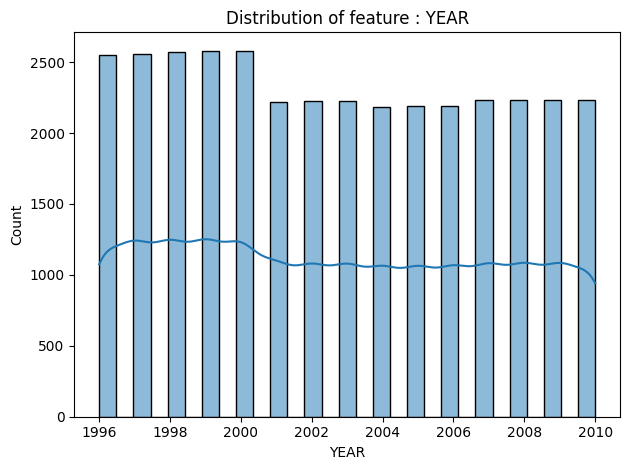

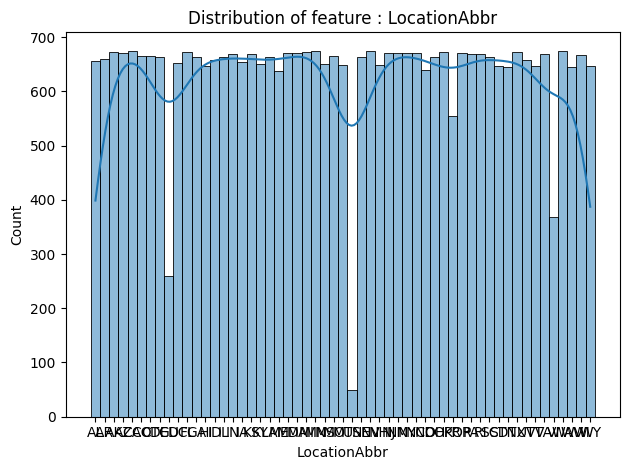

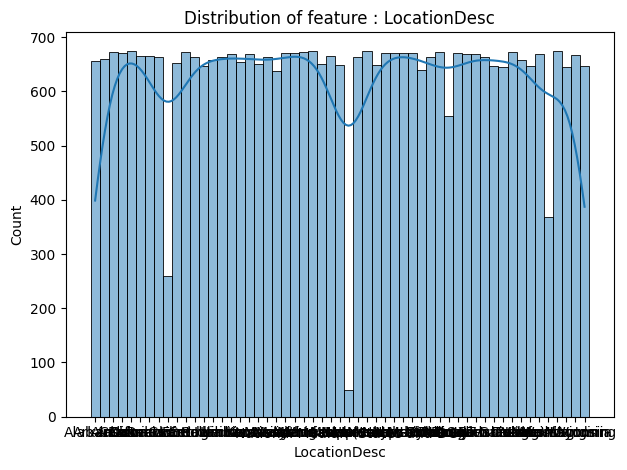

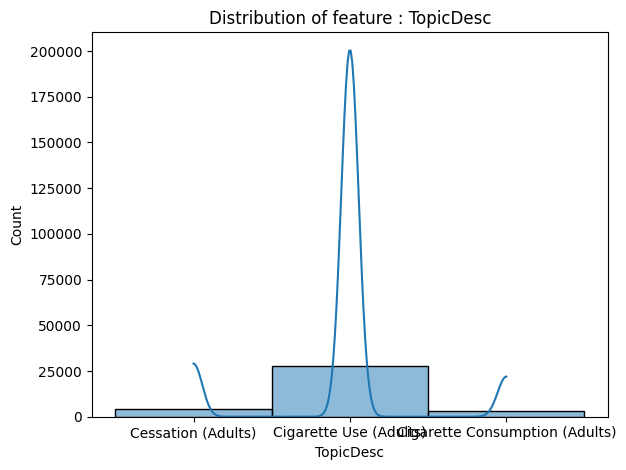

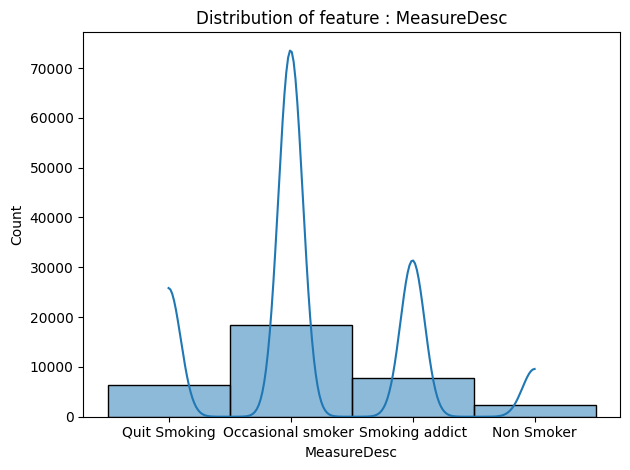

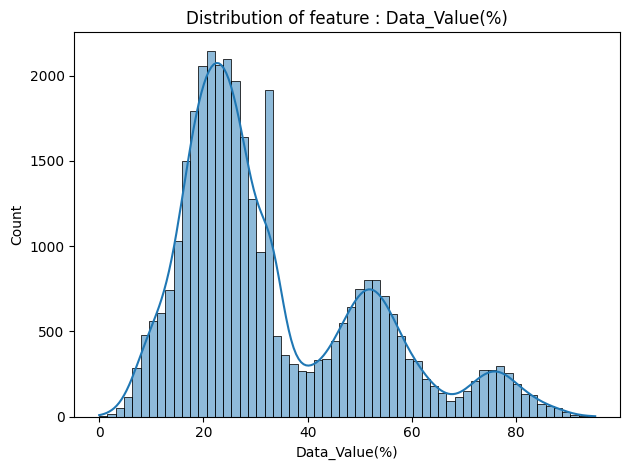

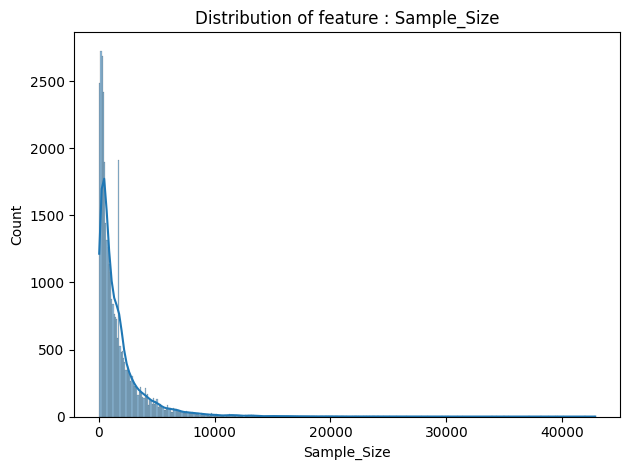

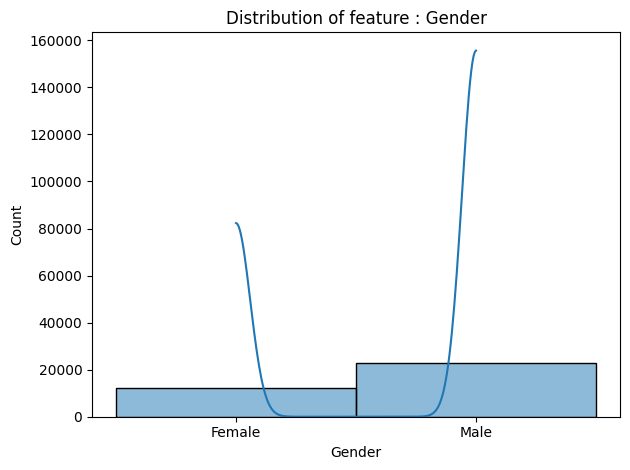

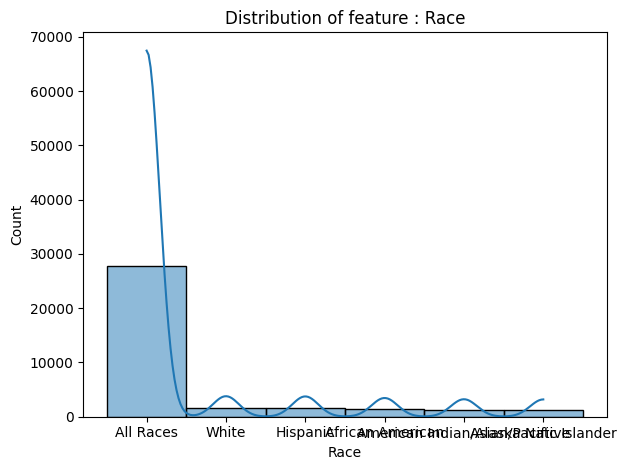

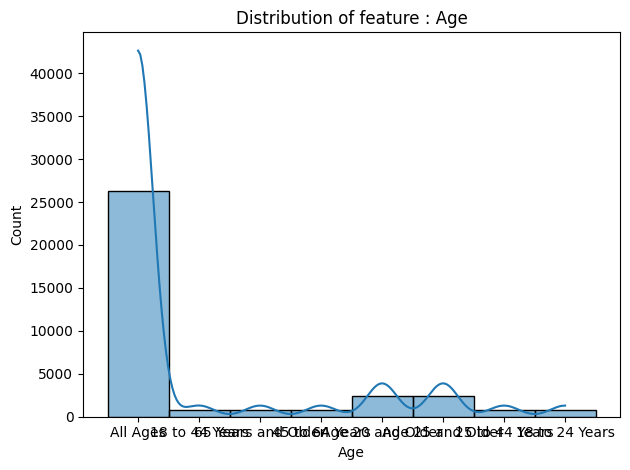

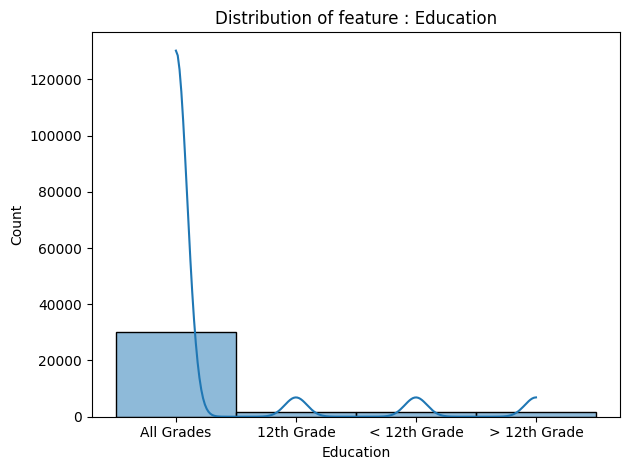

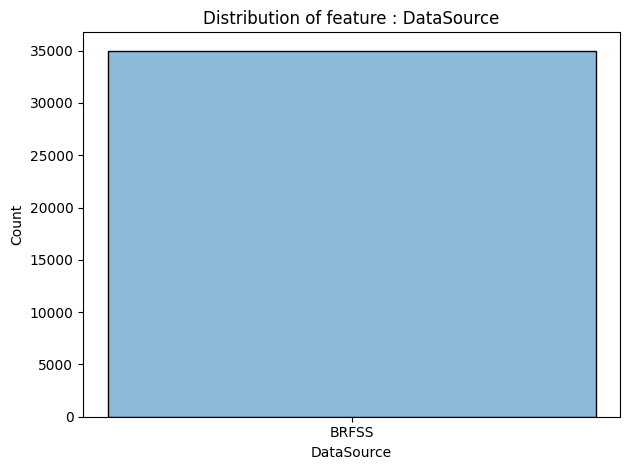

In [93]:
### to draw the histplot for every values of the columns to see distrubution of data
for column in Ctobdata.columns:
    sns.histplot(data=Ctobdata, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

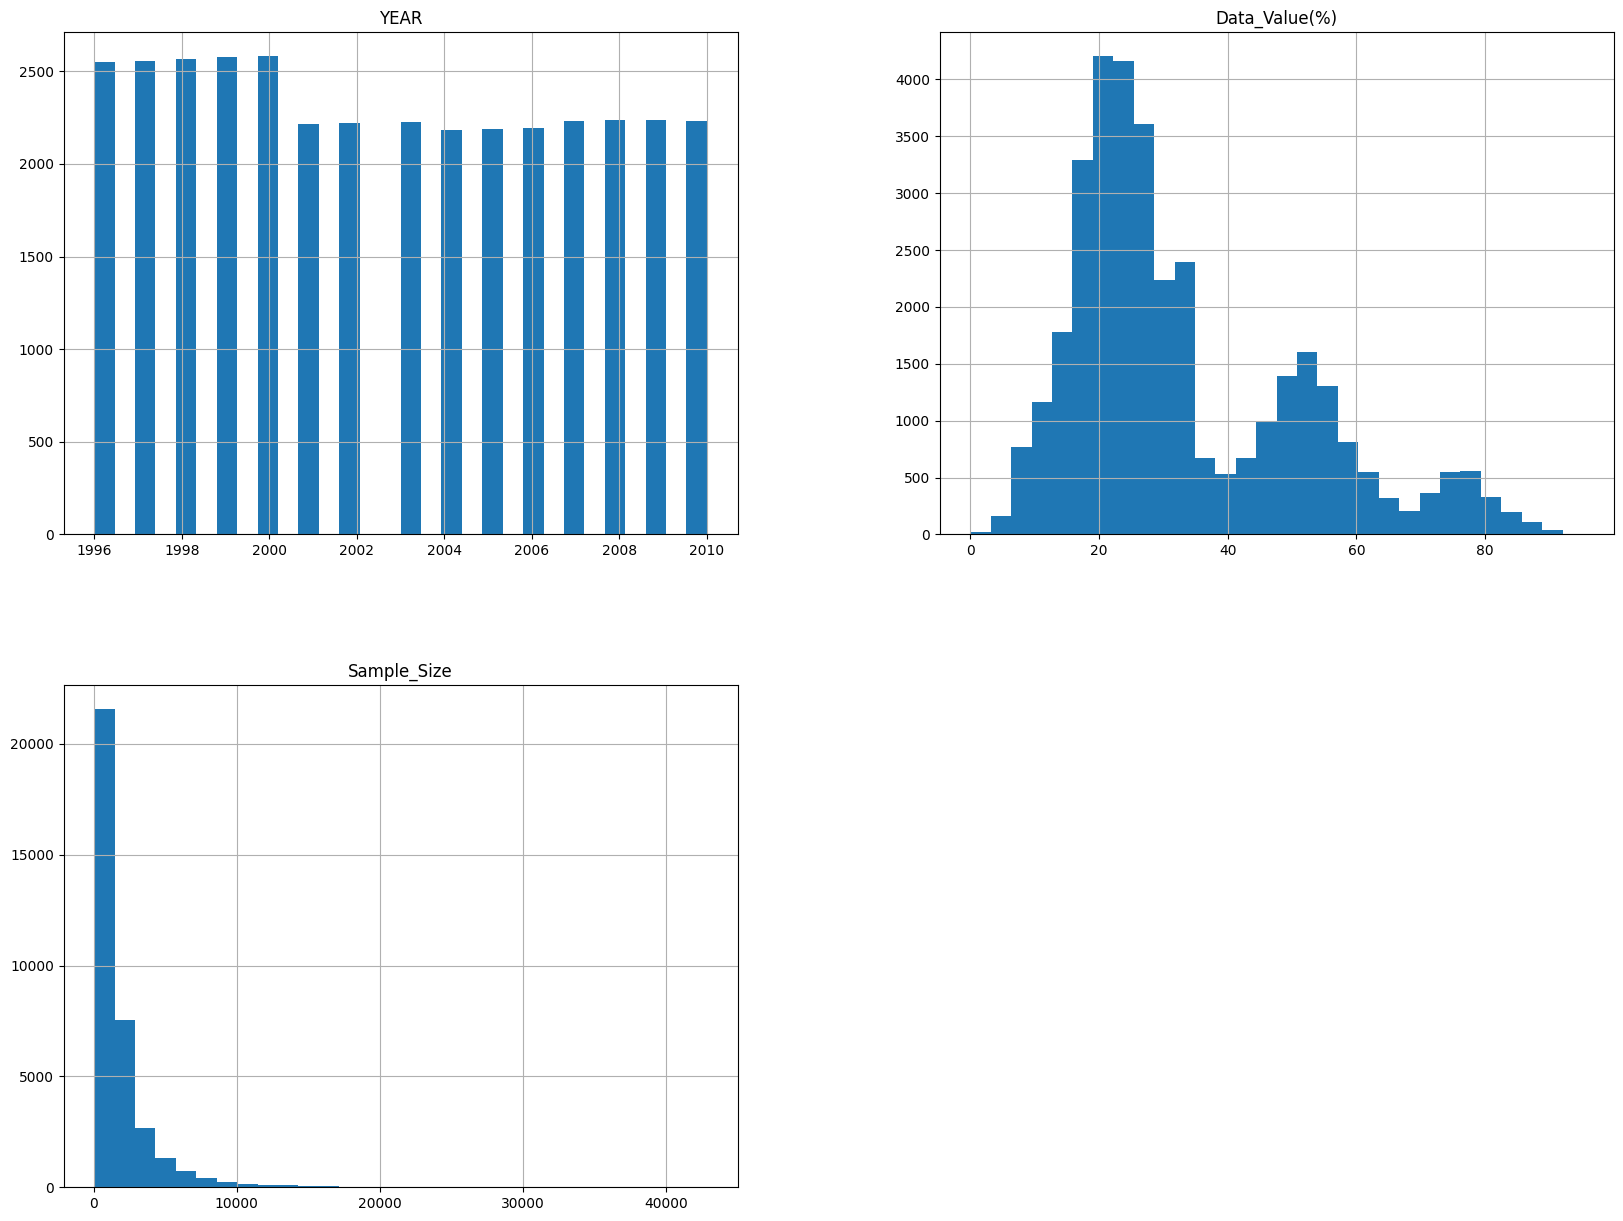

In [94]:
# To visualise the nurerical values using hisplot.
Ctobdata.hist(bins=30, figsize=(20, 15))
plt.show()

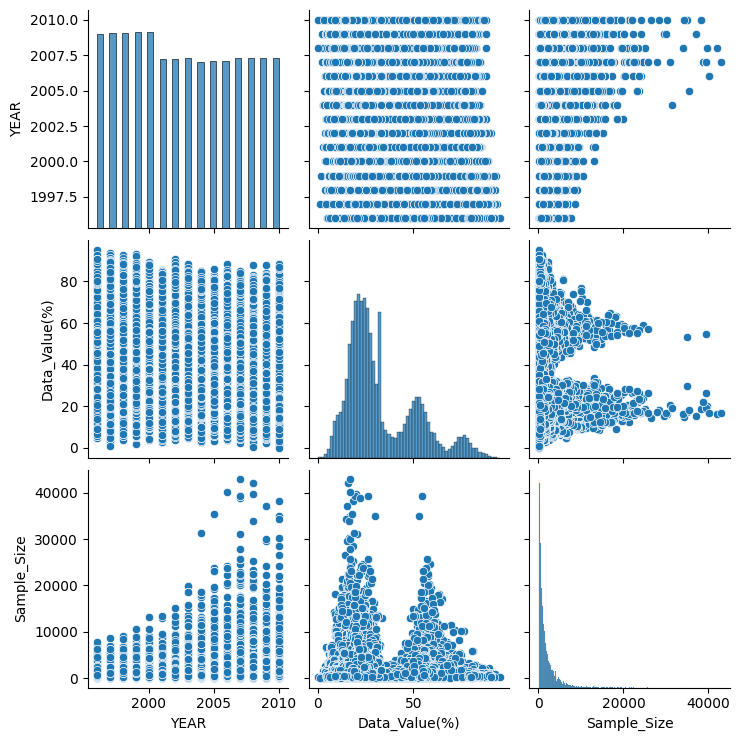

In [95]:
# To visualise the object values using pariplot.
ax = sns.pairplot(Ctobdata[Ctobdata.select_dtypes(exclude=['object']).columns])

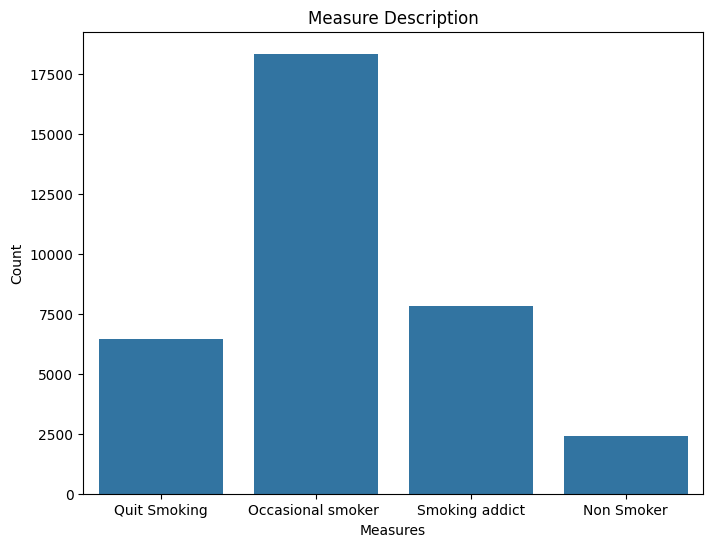

In [96]:
###To understand the target value count.
plt.figure(figsize=(8, 6))
sns.countplot(x="MeasureDesc",data=Ctobdata)
plt.title('Measure Description')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

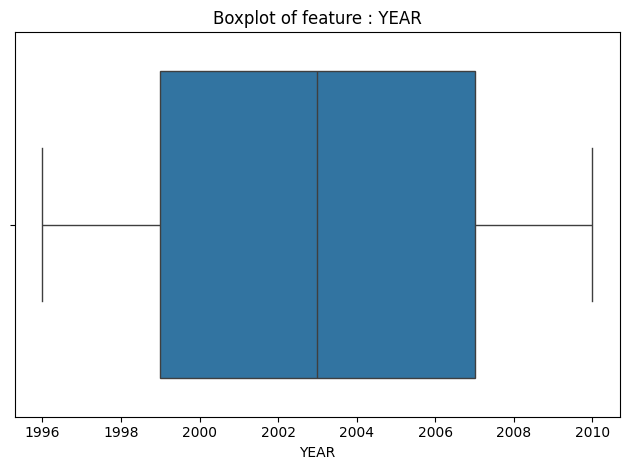

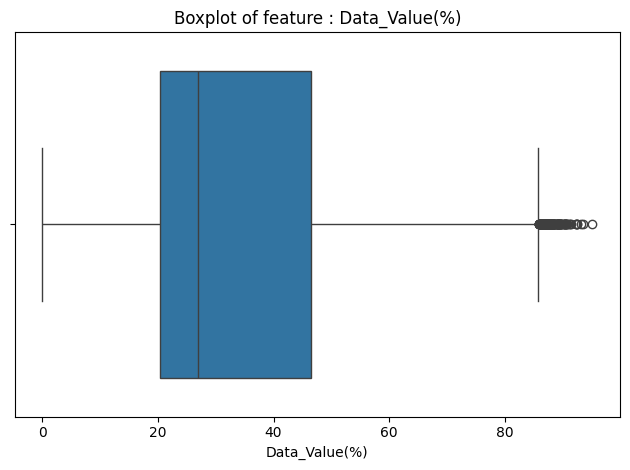

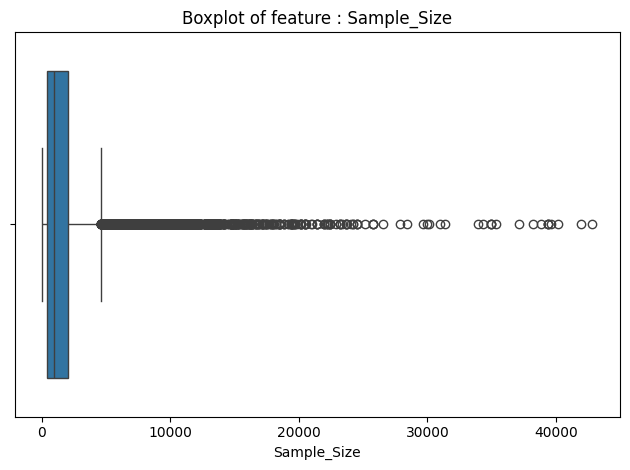

In [97]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

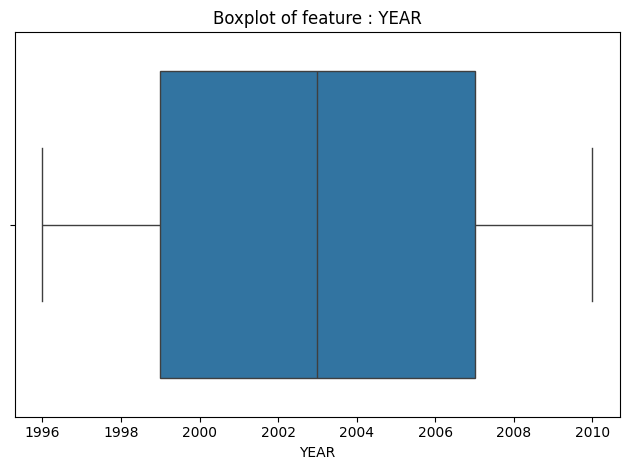

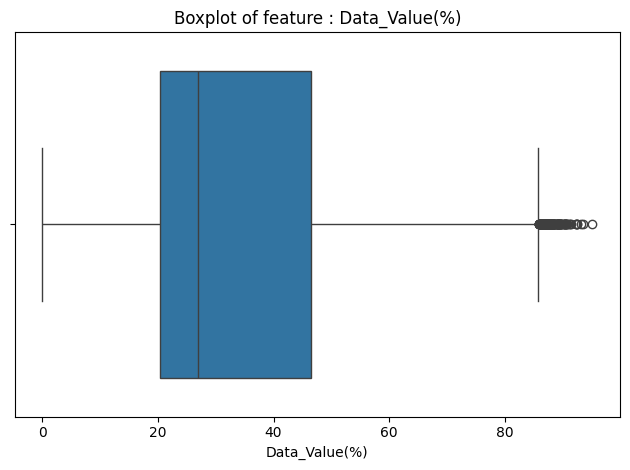

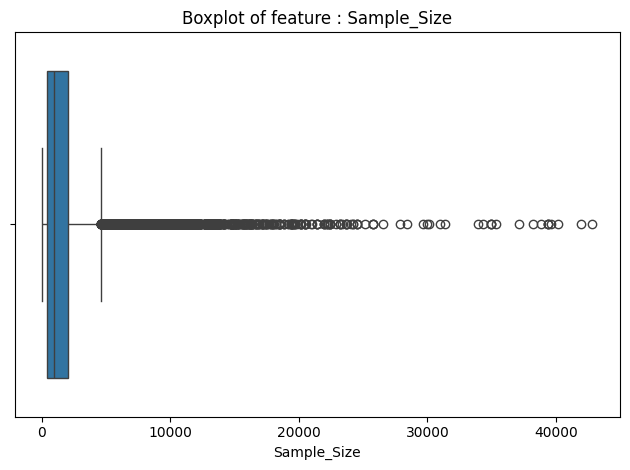

In [98]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [99]:
###Treating outliers with IQR formula
col_list = list(Ctobdata.describe().columns)
print(col_list)
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(Ctobdata[ftr], 25)
  q_75 = np.percentile(Ctobdata[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in Ctobdata[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    Ctobdata[ftr] =  Ctobdata.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

### The code does not remove outliers completely;it replaces outlier values with the upper or lower bounds determined by the IQR.This is a form of outlier treatment, where extreme values are "capped

['YEAR', 'Data_Value(%)', 'Sample_Size']
YEAR 

Percentiles: 25th=1999.000, 75th=2007.000, IQR=8.000

lower = 1987.0 and upper = 2019.0 
 
Identified outliers: 0

-------

Data_Value(%) 

Percentiles: 25th=20.300, 75th=46.500, IQR=26.200

lower = -18.999999999999996 and upper = 85.8 
 
Identified outliers: 148
Data_Value(%) Outliers Removed

-------

Sample_Size 

Percentiles: 25th=391.000, 75th=2076.000, IQR=1685.000

lower = -2136.5 and upper = 4603.5 
 
Identified outliers: 2901
Sample_Size Outliers Removed

-------



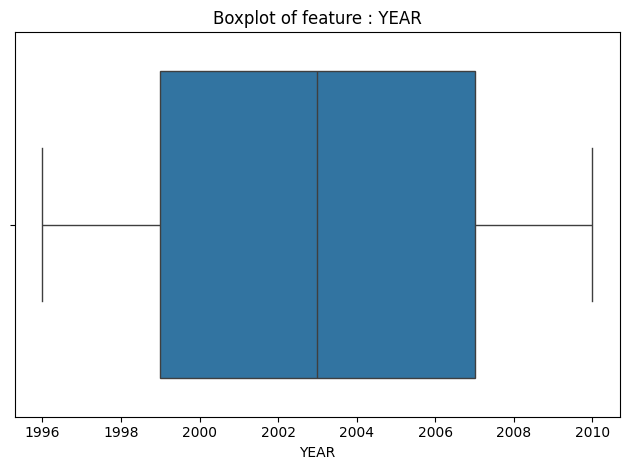

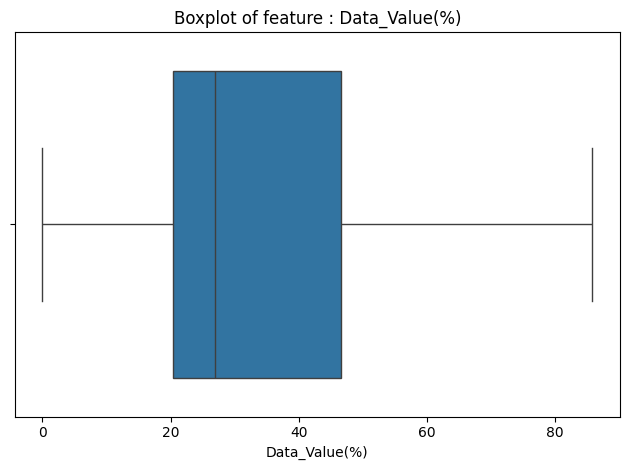

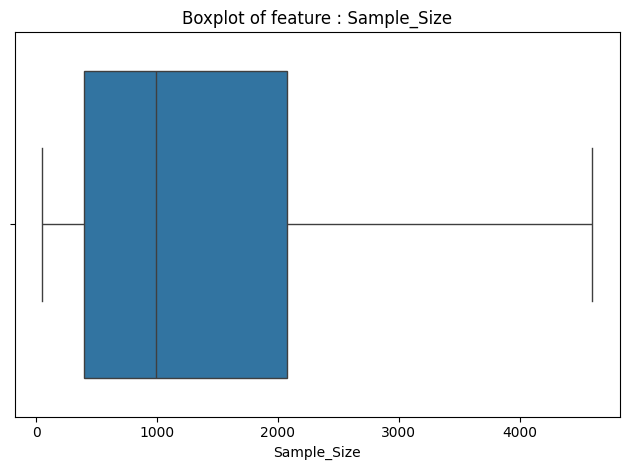

In [100]:
###Boxplot after treating outliers.
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [101]:

Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


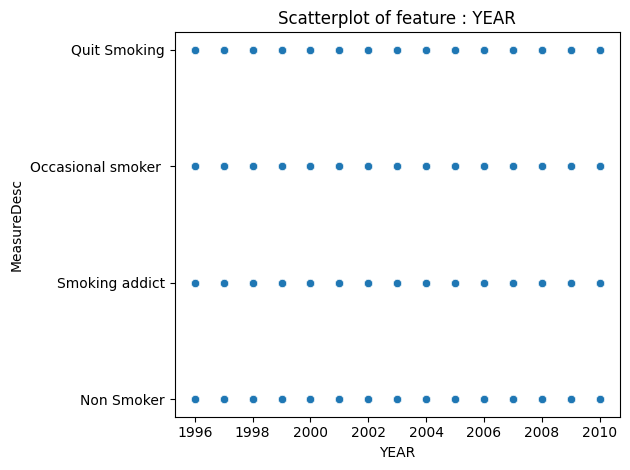

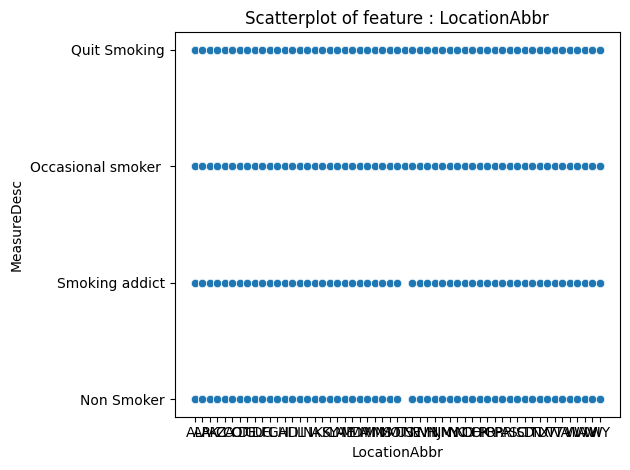

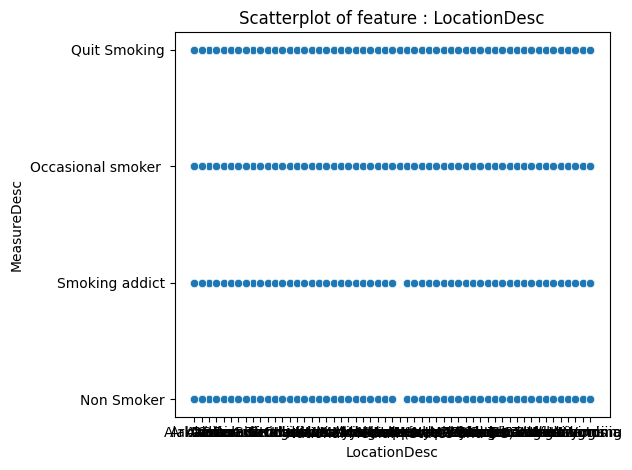

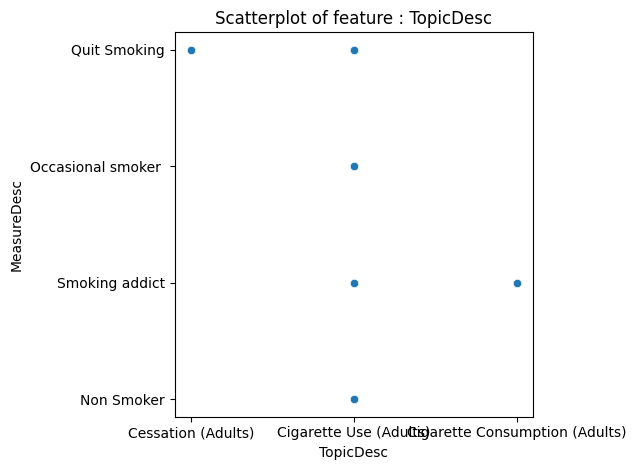

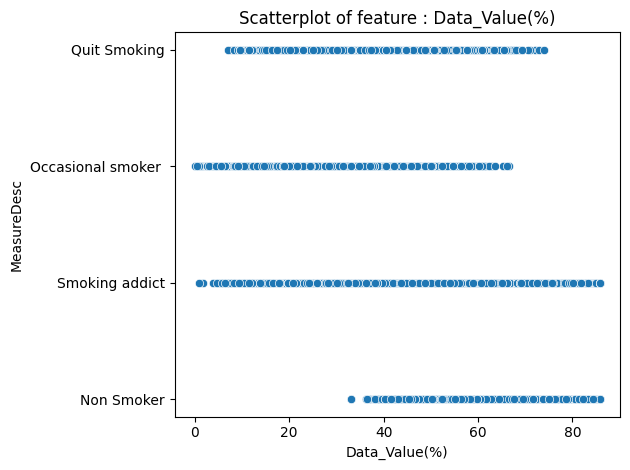

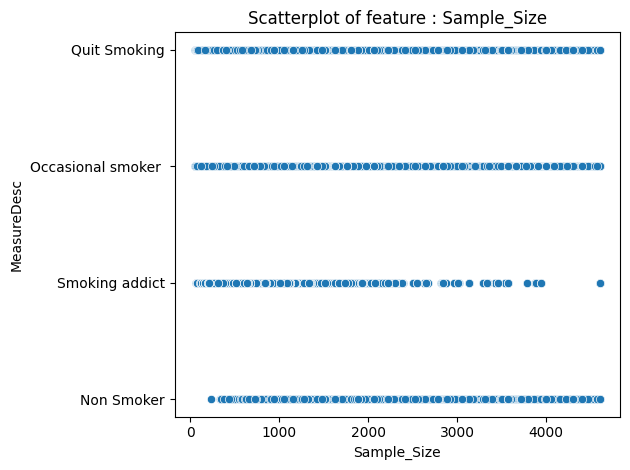

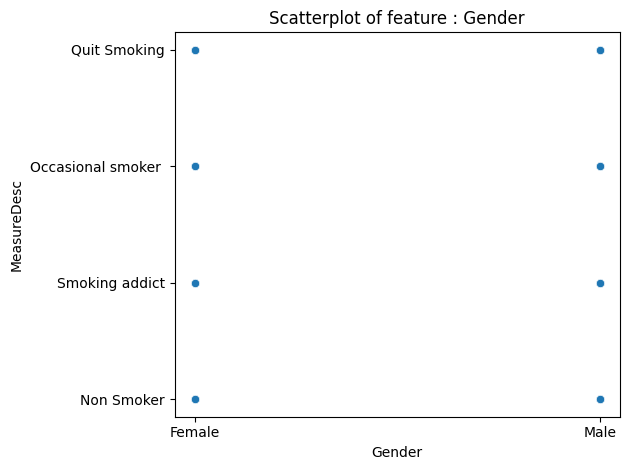

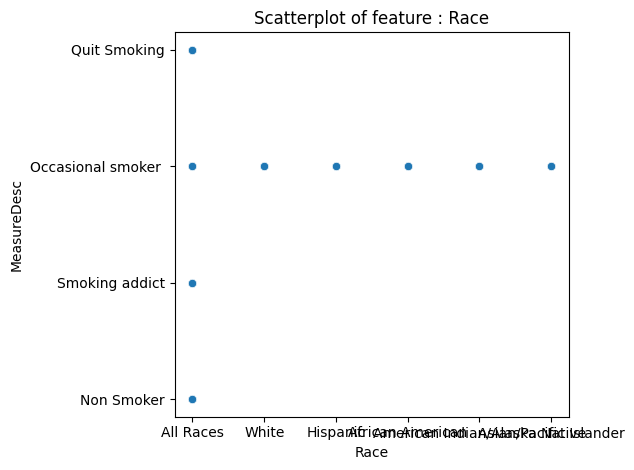

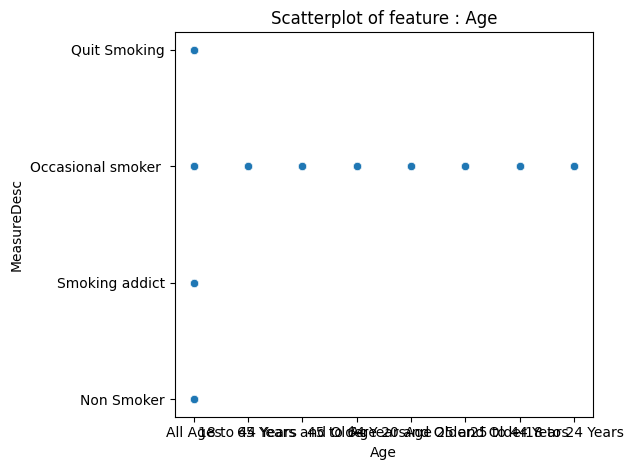

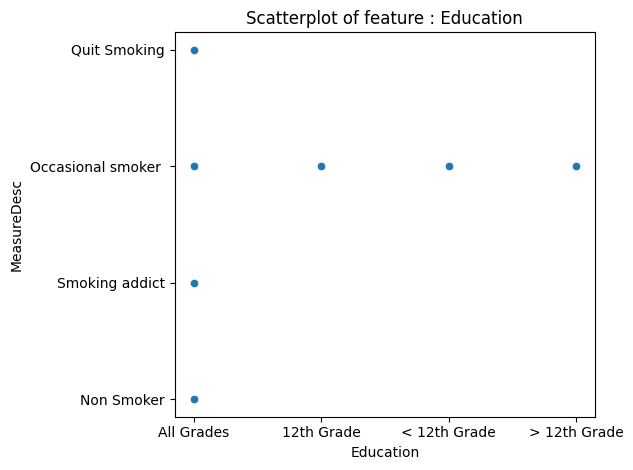

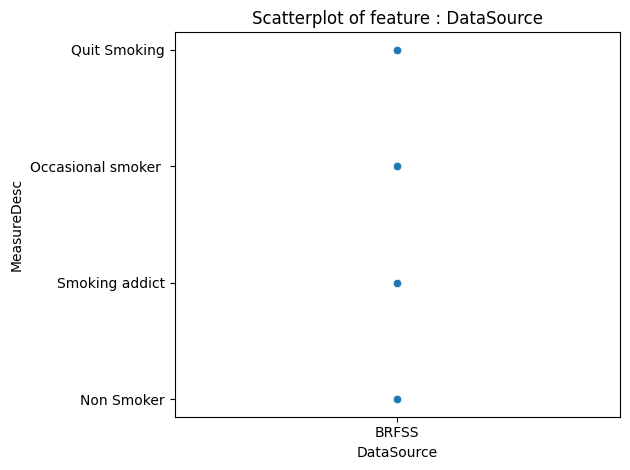

In [102]:
### To display the relation between X values and Y, where Y is tagret value ( MeasureDesc).
plt.show()

for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue
    sns.scatterplot(data=Ctobdata, x=column, y="MeasureDesc")
    plt.title(f"Scatterplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")


In [103]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.018912,0.315718
Data_Value(%),0.018912,1.000000,-0.115097
Sample_Size,0.315718,-0.115097,1.000000


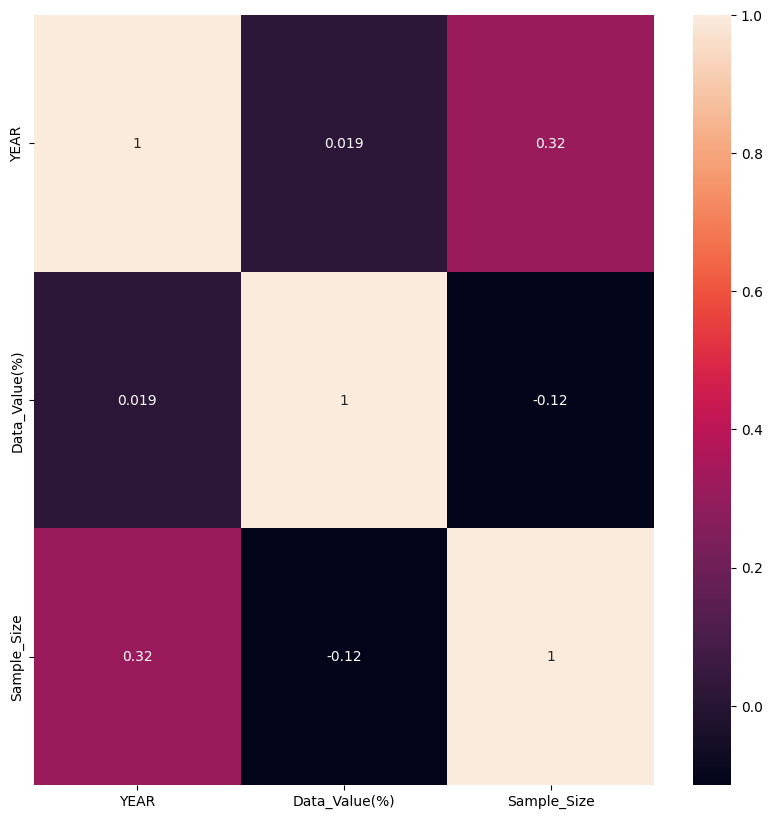

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

5 . Data Encoding

In [105]:
###Adding all object valued columns in one variable to make it easier to navigate.
columns = ['LocationAbbr', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Gender', 'Race', 'Age', 'Education', 'DataSource'] # define categorical columns


Explanation:
pd.get_dummies() automatically creates new columns for each unique category within a categorical variable.
For each category, a binary value (0 or 1) is assigned to indicate the presence or absence of that category in the original data.

In [106]:
encoded_tdf = pd.get_dummies(Ctobdata, columns=columns, dtype=int) # encode categorical columns
encoded_tdf


,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS
0,2010,53.3,659.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2010,18.7,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2010,18.6,1197.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,21.5,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2010,21.8,104.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38046,1996,28.2,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38047,1996,20.8,516.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38048,1996,13.9,309.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [107]:
encoded_tdf.shape

(34997, 141)

6. Standardizing Features

In [108]:
from sklearn.preprocessing import StandardScaler
# Assume 'encoded_tdf' is your DataFrame with the features to be standardized
# (exclude the target variable and any non-numeric columns if necessary)

# Select numeric columns only (if necessary)
X = encoded_tdf.select_dtypes(include=['float64', 'int64'])

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)


7. Principal Component Analysis (PCA)

In [109]:
### importing neccesary library.
from sklearn.decomposition import PCA

In [110]:
###Apply PCA

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)  # You can change the number of components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])



In [111]:
###Explained Variance

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio
print(f"Explained Variance Ratio (for each component): {explained_variance}")

# Total variance explained by the selected components
print(f"Total variance explained by the selected components: {sum(explained_variance)}")

pca_df['Target'] = Ctobdata['MeasureDesc']


Explained Variance Ratio (for each component): [0.4434454  0.33738304]
Total variance explained by the selected components: 0.780828440850622


In [112]:
###Displaying the pca_df dataset
pca_df

,PC1,PC2,Target
0,0.450744,1.635036,Quit Smoking
1,2.885548,-0.281985,Occasional smoker
2,1.130462,-0.180855,Occasional smoker
3,2.853082,-0.136813,Occasional smoker
4,0.529854,0.019168,Occasional smoker
...,...,...,...
34992,-1.937173,0.592421,Smoking addict
34993,-1.638021,-0.745238,Smoking addict
34994,-1.392911,-1.138552,Smoking addict
34995,-1.419626,-1.489837,Smoking addict


In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
pca_df['Target'] = label_encoder.fit_transform(pca_df['Target'])

# Check the encoding
print(pca_df['Target'].value_counts())

Target
1    17074
3     6826
2     6096
4     2783
0     2218
Name: count, dtype: int64


In [113]:
### importing neccesary library.

import matplotlib.pyplot as plt
import seaborn as sns

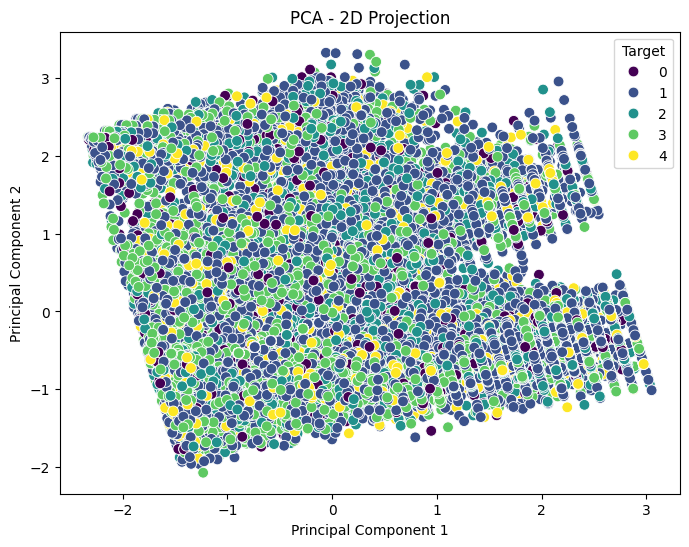

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df,hue="Target", palette='viridis', s=60)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

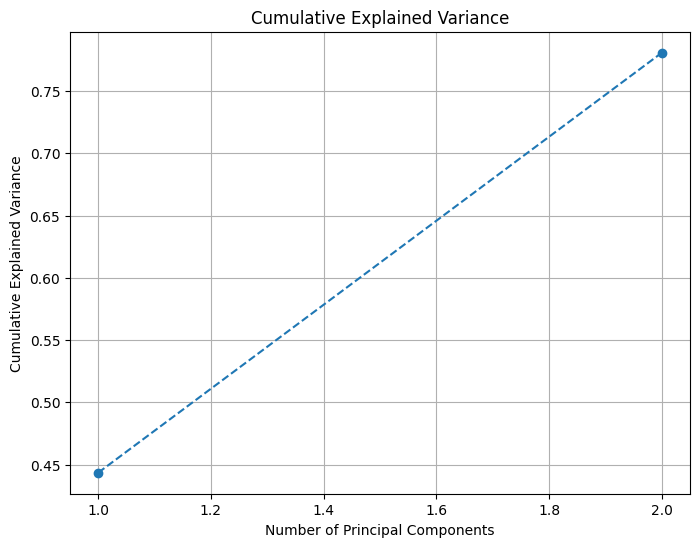

In [123]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [124]:
from sklearn.model_selection import train_test_split

# Assuming `encoded_tdf` is your DataFrame with features after encoding and `target_column_name` is your target variable

# 1. Define your features (X) and target (y)
X = pca_df.drop(columns=['Target'])  # Drop the target column from the feature set
y = pca_df['Target']  # The target column (replace 'target_column_name' with your actual column name)

from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (27997, 2)
X_test shape: (7000, 2)
y_train shape: (27997,)
y_test shape: (7000,)


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
linear_reg =  LinearRegression().fit(X_train,y_train)

print("Linear reg:",linear_reg.score(X_train,y_train))


# Predict on the model
y_pred = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10*(y_test), 10*(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Number of data points (n) and features (p)
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features (PC1, PC2)

# Adjusted R² formula
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print Adjusted R²
print("Adjusted R²:", adjusted_r2)

Linear reg: 0.009218444534662584
MSE : 117.98972728676895
RMSE : 10.862307640955901
Adjusted R²: 0.007767914499906214
